In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import keras
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

In [10]:
tf.random.set_seed(42)

In [11]:
hand = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [13]:
(X_train, y_train), (X_test, y_test) = hand

In [14]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

/tmp/ipython-input-14-1539957955.py:2: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.arrayprint.
  np.core.arrayprint._line_width = 180000


In [15]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

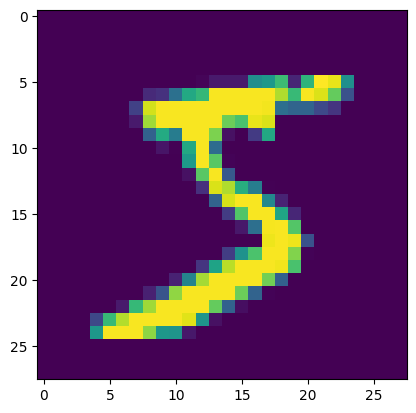

In [18]:
plt.imshow(X_train[0])

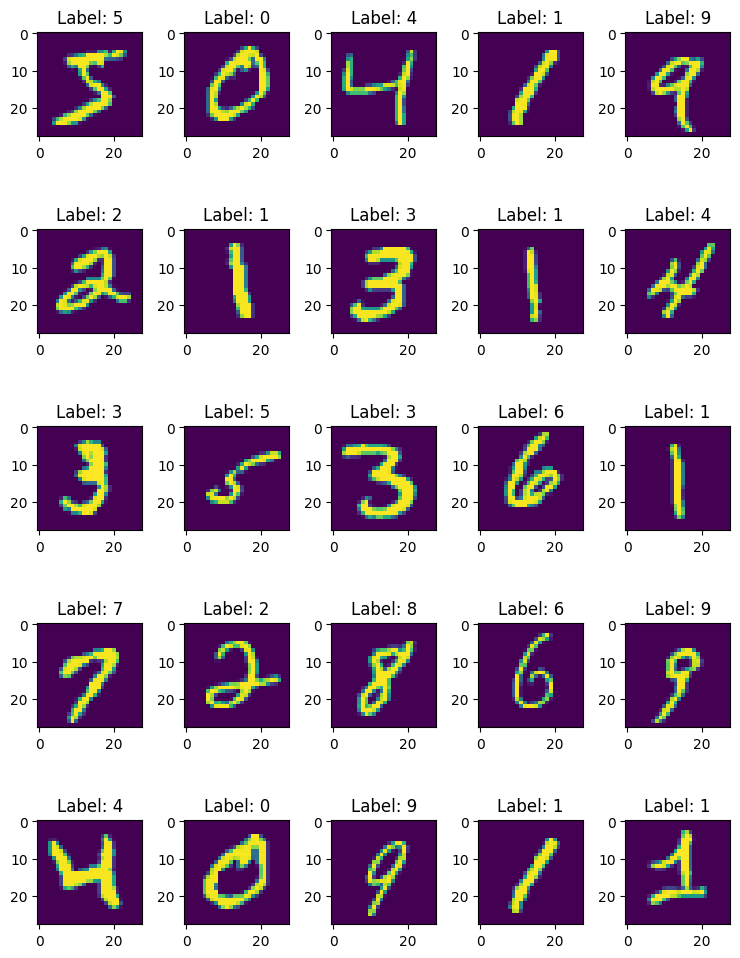

In [19]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [20]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [21]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [22]:
X_train /= 255
X_test /= 255

In [23]:
# 6. Preprocess class labels
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [24]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [25]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [26]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 101s 53ms/step - accuracy: 0.8728 - loss: 0.4013
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.9734 - loss: 0.0885
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 53ms/step - accuracy: 0.9795 - loss: 0.0674
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.9841 - loss: 0.0532
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.9857 - loss: 0.0456
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 53ms/step - accuracy: 0.9863 - loss: 0.0428
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 52ms/step - accuracy: 0.9885 - loss: 0.0366
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 53ms/step - accuracy: 0.9890 - loss: 0.0370
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 53ms/step - accuracy: 0.9898 - loss: 0.0308
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 53ms/step - accuracy: 0.9903 - loss: 0.0286


In [28]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 4s - 14ms/step - accuracy: 0.9921 - loss: 0.0321


In [29]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([[3.0857163e-14, 4.5948817e-10, 1.0984750e-09, 1.4497326e-09,
        2.4222941e-13, 9.4965573e-14, 3.3123959e-19, 1.0000000e+00,
        1.1582461e-13, 3.7275791e-09],
       [5.9454577e-14, 3.7325712e-10, 1.0000000e+00, 1.3241215e-17,
        5.0498975e-18, 2.9093039e-21, 3.0371061e-14, 4.0172794e-17,
        9.2317406e-17, 3.0107099e-24],
       [2.0699482e-10, 9.9999344e-01, 6.2569889e-08, 4.0692472e-09,
        3.7442196e-06, 1.3271500e-07, 1.4769743e-06, 1.1122916e-06,
        8.2796205e-08, 3.6209409e-09],
       [9.9999988e-01, 2.6975201e-14, 6.4216670e-12, 1.9597420e-12,
        2.5287300e-11, 1.2501324e-11, 1.2666094e-07, 8.4459531e-12,
        8.2633989e-10, 2.5662319e-10]], dtype=float32)

In [30]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([1., 1., 1., 1.], dtype=float32)

In [31]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [32]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1132    1    2    0    0    0    0    0    0]
 [   1    1 1026    1    0    0    0    3    0    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   1    0    1    0  969    0    3    0    2    6]
 [   0    0    0    1    0  889    1    0    1    0]
 [   5    1    0    0    1    4  945    0    2    0]
 [   1    2    5    2    0    0    0 1016    1    1]
 [   2    0    2    1    0    0    0    1  966    2]
 [   1    0    0    0    3    4    0    1    5  995]]


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
path = '/content/drive/MyDrive/climate-wins-datasets/numbers'

In [68]:
from PIL import Image
import numpy as np

# open individual digit files and add to list
digits = []
digit_0 = Image.open(path + '/digit_0.png')
digit_1 = Image.open(path + '/digit_1.png')
digit_2 = Image.open(path + '/digit_2.png')
digit_3 = Image.open(path + '/digit_3.png')
digit_4 = Image.open(path + '/digit_4.png')
digit_5 = Image.open(path + '/digit_5.png')
digit_6 = Image.open(path + '/digit_6.png')
digit_7 = Image.open(path + '/digit_7.png')
digit_8 = Image.open(path + '/digit_8.png')
digit_9 = Image.open(path + '/digit_9.png')
digits.append(digit_0)
digits.append(digit_1)
digits.append(digit_2)
digits.append(digit_3)
digits.append(digit_4)
digits.append(digit_5)
digits.append(digit_6)
digits.append(digit_7)
digits.append(digit_8)
digits.append(digit_9)


In [73]:
digits

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=240x600>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=240x600>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=240x600>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=240x600>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=240x600>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=240x600>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=240x600>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=240x600>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=240x600>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=240x600>]

In [75]:

formatted_digits = []
for digit in digits:
    # Convert to grayscale
    digit = digit.convert('L')

    # Resize to 28x28
    digit = digit.resize((28, 28), Image.LANCZOS)

    # Convert to NumPy and reshape
    testimg = np.asarray(digit).reshape(1, 28, 28, 1)

    # Normalize
    testimg = testimg.astype('float32') / 255.0
    formatted_digits.append(testimg)


In [83]:
formatted_digits[:2]
len(formatted_digits)

10

In [85]:
# predict the class
for digit in formatted_digits:
    predict_value = model.predict(digit)
    predict_value = argmax(predict_value)
    print(digit, predict_value)

Streaming output truncated to the last 5000 lines.
   [0.8352941 ]
   [1.        ]
   [0.9607843 ]
   [0.9647059 ]
   [0.9647059 ]
   [0.9647059 ]
   [0.9647059 ]
   [0.9607843 ]
   [0.9647059 ]
   [0.9647059 ]
   [0.9647059 ]
   [0.96862745]]

  [[0.9764706 ]
   [0.9764706 ]
   [0.972549  ]
   [0.9529412 ]
   [0.9529412 ]
   [0.9607843 ]
   [0.9764706 ]
   [0.972549  ]
   [0.9411765 ]
   [0.98039216]
   [0.54509807]
   [0.        ]
   [0.01176471]
   [0.1764706 ]
   [0.54509807]
   [0.9843137 ]
   [0.99215686]
   [0.95686275]
   [0.9764706 ]
   [0.9647059 ]
   [0.9529412 ]
   [0.9529412 ]
   [0.9647059 ]
   [0.9764706 ]
   [0.9764706 ]
   [0.95686275]
   [0.9529412 ]
   [0.9529412 ]]

  [[0.94509804]
   [0.94509804]
   [0.9529412 ]
   [0.9843137 ]
   [0.9843137 ]
   [0.96862745]
   [0.9411765 ]
   [0.9411765 ]
   [0.9647059 ]
   [0.98039216]
   [0.9254902 ]
   [0.78431374]
   [0.8039216 ]
   [0.95686275]
   [1.        ]
   [0.98039216]
   [0.9647059 ]
   [0.94509804]
   [0.9411765 ]
 